In [1]:
# Import basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import yfinance as yf

# Linear Regression

In [2]:
stock_list = ["SPY", "^VIX", "GC=F", "BZ=F", "CL=F"]
data2 = yf.download(stock_list, start="2013-01-01", end="2023-05-25")
data2 = pd.DataFrame(data2["Close"]).fillna(method="ffill")
data2

[*********************100%***********************]  5 of 5 completed


,BZ=F,CL=F,GC=F,SPY,^VIX
Date,,,,,
2013-01-02,112.470001,93.120003,1687.900024,146.059998,14.680000
2013-01-03,112.139999,92.919998,1673.699951,145.729996,14.560000
2013-01-04,111.309998,93.089996,1648.099976,146.369995,13.830000
2013-01-07,111.400002,93.190002,1645.500000,145.970001,13.790000
2013-01-08,111.940002,93.150002,1661.500000,145.550003,13.620000
...,...,...,...,...,...
2023-05-18,75.860001,71.860001,1956.500000,419.230011,16.049999
2023-05-19,75.580002,71.550003,1978.699951,418.619995,16.809999
2023-05-22,75.989998,71.989998,1974.800049,418.790009,17.209999


In [3]:
data2.isna().any()

BZ=F    False
CL=F    False
GC=F    False
SPY     False
^VIX    False
dtype: bool

### Correlation Test

<AxesSubplot:title={'center':'Correlation Matrix'}>

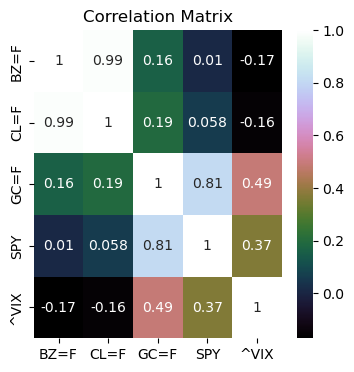

In [4]:
corr = data2.corr()

plt.figure(figsize = (4,4)
          )

plt.title("Correlation Matrix")

sns.heatmap(corr,
            annot = True,
            cmap = "cubehelix")

In [5]:
# Replace 1's with 0 (because those are self correlations)
abs_corr = corr.abs().replace(1,0)

# Get maximum correlation for each columns
max_corr_columns = abs_corr.idxmax()

# Get the maximum correlation for each row
max_correlations = abs_corr.max()

max_corr_df = pd.DataFrame({"Max Correlation With": max_corr_columns, "Correlation": max_correlations})

max_corr_df

,Max Correlation With,Correlation
BZ=F,CL=F,0.989223
CL=F,BZ=F,0.989223
GC=F,SPY,0.809281
SPY,GC=F,0.809281
^VIX,GC=F,0.490784


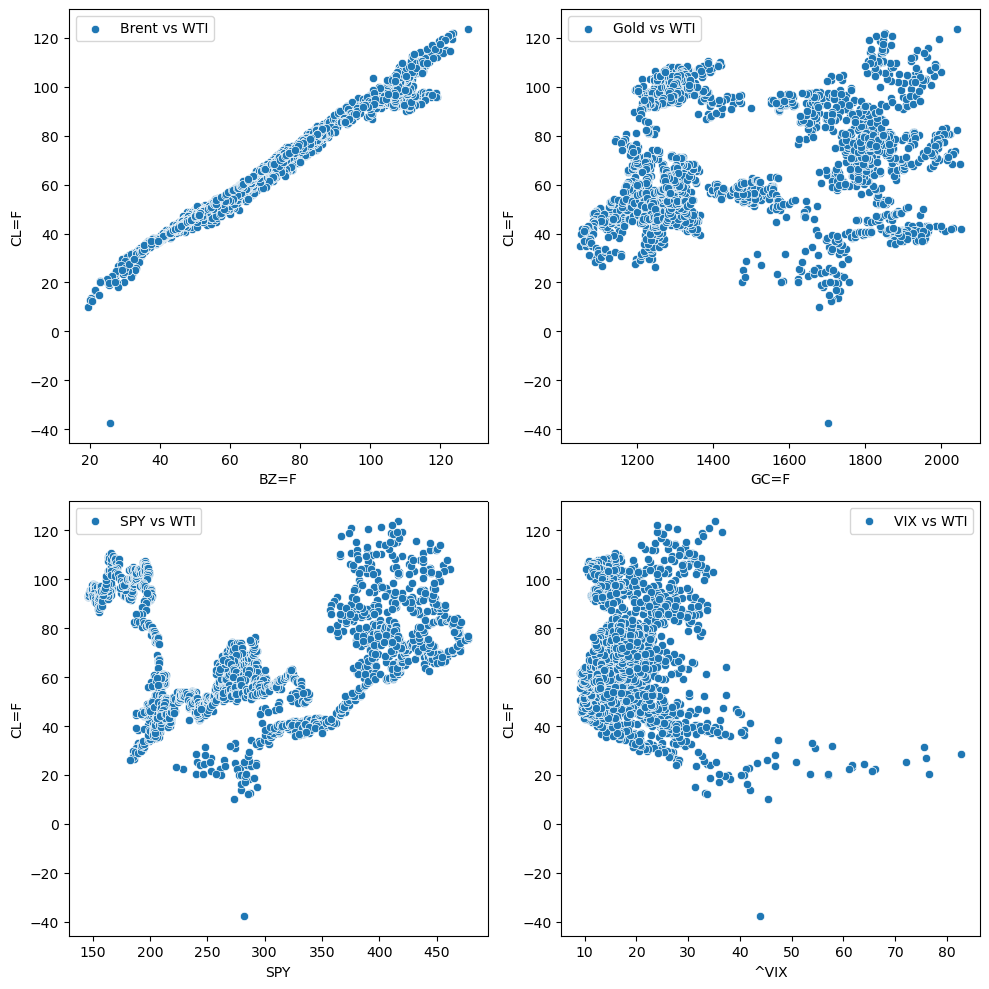

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

sns.scatterplot(data=data2, x='BZ=F', y='CL=F', label='Brent vs WTI', ax=axs[0, 0])
sns.scatterplot(data=data2, x='GC=F', y='CL=F', label='Gold vs WTI', ax=axs[0, 1])
sns.scatterplot(data=data2, x='SPY', y='CL=F', label='SPY vs WTI', ax=axs[1, 0])
sns.scatterplot(data=data2, x='^VIX', y='CL=F', label='VIX vs WTI', ax=axs[1, 1])

plt.tight_layout()
plt.show()

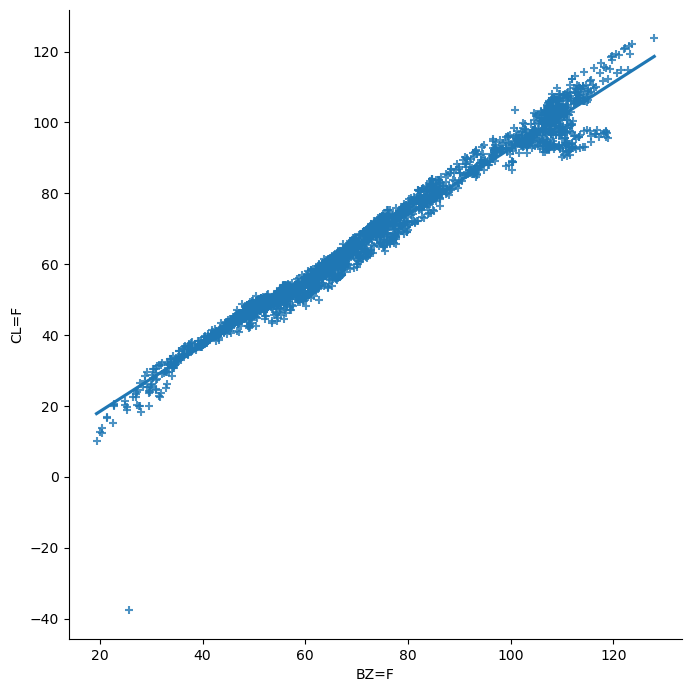

In [7]:
sns.pairplot(data2, x_vars="BZ=F", y_vars="CL=F", height=7, aspect=1, kind='reg', diag_kind=None, markers = "+",)

### We can infer that from the correlation matrix and scatterplot that Brent has a linear relationship with WTI

In [8]:
from pandas_datareader import data as pdr
import datetime

# "POILBREUSDM" = Global Brent Crude Price, "POILWTIUSDM" = Global Brent Crude Price, Currency is USD nominal
stock_list3 = ["POILBREUSDM", "POILWTIUSDM"]
start_date_plt = datetime.date(1990, 1, 1)
end_date_plt = datetime.date(2023, 5, 25)
data_plt = pdr.DataReader(stock_list3, "fred", start_date_plt, end_date_plt)
data_plt

,POILBREUSDM,POILWTIUSDM
DATE,,
1990-01-01,20.989130,22.604348
1990-02-01,19.702500,22.202500
1990-03-01,18.465909,20.440455
1990-04-01,16.926190,18.526667
1990-05-01,16.671739,18.443043
...,...,...
2023-01-01,84.081818,78.251364
2023-02-01,83.632500,77.027500
2023-03-01,79.256522,73.348261


### Raw price plot of Brent and WTI crude futures

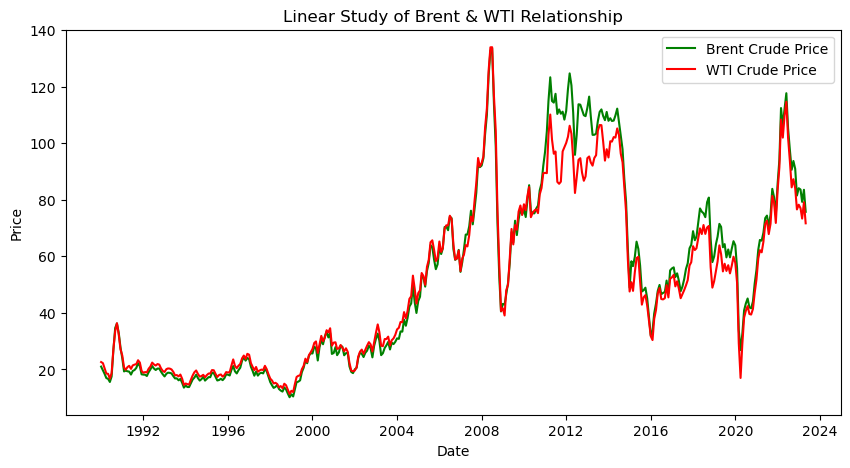

In [9]:
plt.figure(figsize=(10, 5))

plt.plot(data_plt.index, data_plt.iloc[:,0], color='green', label='Brent Crude Price')
plt.plot(data_plt.index, data_plt.iloc[:,1], color='red', label='WTI Crude Price')

plt.title('Linear Study of Brent & WTI Relationship')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline


### We model the relationship by regressing the current price of the Y variable, CL=F, against the 1-day lagged price of the X variable, BZ=F.

### Test Period (1990-01-01 to 2016-12-01)

In [11]:
from pandas_datareader import data as pdr
import datetime

# "POILBREUSDM" = Global Brent Crude Price, "POILWTIUSDM" = Global Brent Crude Price, Currency is USD nominal
stock_list3 = ["POILBREUSDM", "POILWTIUSDM"]
start_date = datetime.date(1990, 1, 1)
end_date = datetime.date(2016, 12, 31)
data4 = pdr.DataReader(stock_list3, "fred", start_date, end_date)
data4

,POILBREUSDM,POILWTIUSDM
DATE,,
1990-01-01,20.989130,22.604348
1990-02-01,19.702500,22.202500
1990-03-01,18.465909,20.440455
1990-04-01,16.926190,18.526667
1990-05-01,16.671739,18.443043
...,...,...
2016-08-01,47.052174,44.751739
2016-09-01,47.376818,45.200000
2016-10-01,51.413810,49.809524


In [12]:
data4.isna().sum()

POILBREUSDM    0
POILWTIUSDM    0
dtype: int64

In [13]:
ab = int(len(data4)* 0.7)
data4.iloc[ab]

POILBREUSDM    52.7135
POILWTIUSDM    56.9680
Name: 2008-11-01 00:00:00, dtype: float64

In [19]:
# Take the lag 1 price of X to predict current price of y - using past price data of X to predict future outcome of Y
X3 = data4[['POILBREUSDM']]
y3 = data4['POILWTIUSDM']
X3 = data4['POILBREUSDM'].shift(1)
#Remove first row that contains NaN
X3 = X.iloc[1:]
y3 = y.iloc[1:]

In [20]:
print(X3,y3)

DATE
1990-03-01    19.702500
1990-04-01    18.465909
1990-05-01    16.926190
1990-06-01    16.671739
1990-07-01    15.552381
                ...    
2016-08-01    46.598571
2016-09-01    47.052174
2016-10-01    47.376818
2016-11-01    51.413810
2016-12-01    46.942273
Name: POILBREUSDM, Length: 322, dtype: float64 DATE
1990-03-01    20.440455
1990-04-01    18.526667
1990-05-01    18.443043
1990-06-01    16.697143
1990-07-01    18.636818
                ...    
2016-08-01    44.751739
2016-09-01    45.200000
2016-10-01    49.809524
2016-11-01    45.470909
2016-12-01    52.052727
Name: POILWTIUSDM, Length: 322, dtype: float64


In [21]:
# Assigning date indexes to train and test dataset
split_point3 = int(len(data4) * 0.7)

# Split X_train, X_test, Y_train, Y_test
X3_train, X3_test = X3.iloc[:split_point3], X3.iloc[split_point3:]
y3_train, y3_test = y3.iloc[:split_point3], y3.iloc[split_point3:]

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

# Reshape X_train and X_test to be 2D array
X3_train = np.array(X3_train).reshape(-1, 1)
X3_test = np.array(X3_test).reshape(-1, 1)

# instantiate and fit
lm = LinearRegression()
lm.fit(X3_train, y3_train)

# Predict the values for the training set
y3_train_pred = lm.predict(X3_train)

# Prediction for testing set
y3_pred = lm.predict(X3_test)

In [24]:
# Store results in df
train3_df = pd.DataFrame({'Actual': y3_train.values.squeeze(), 'Predicted': y3_train_pred.squeeze()}, index=X3.iloc[:split_point3].index)

test3_df = pd.DataFrame({'Actual': y3_test.values.squeeze(), 'Predicted': y3_pred.squeeze()}, index=X3.iloc[split_point3:].index)

print(len(test3_df))
print(len(y3_test))
print(len(y3_pred))

96
96
96


In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

test3_r2 = lm.score(X3_test, y3_test)
test3_mae = mean_absolute_error(y3_test, y3_pred)
test3_mse = mean_squared_error(y3_test, y3_pred)
test3_rmse = np.sqrt(test3_mse)
test3_evs = explained_variance_score(y3_test, y3_pred)

print(f'R Squared score: {test3_r2:.2f}')
print(f'Mean absolute error: {test3_mae:.2f}')
print(f'Mean squared error: {test3_mse:.2f}')
print(f'Root mean squared error: {test3_rmse:.2f}')
print(f'Explained Variance Score: {test3_evs:.2f}')

R Squared score: 0.71
Mean absolute error: 9.31
Mean squared error: 145.62
Root mean squared error: 12.07
Explained Variance Score: 0.83


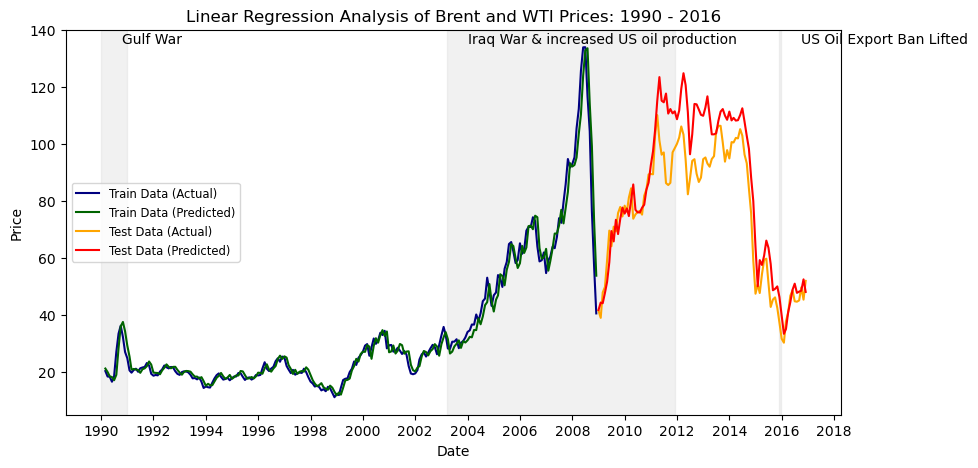

In [26]:
plt.figure(figsize=(10, 5))

plt.plot(train3_df.index, train3_df['Actual'], color='navy', label='Train Data (Actual)')
plt.plot(train3_df.index, train3_df['Predicted'], color='darkgreen', label='Train Data (Predicted)')
plt.plot(test3_df.index, test3_df['Actual'], color='orange', label='Test Data (Actual)')
plt.plot(test3_df.index, test3_df['Predicted'], color='red', label='Test Data (Predicted)')

plt.title("Linear Regression Analysis of Brent and WTI Prices: 1990 - 2016")
plt.xlabel('Date')
plt.ylabel('Price')

# X-tick frequency and format
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Plot Annotation
# Gulf War
start_date1 = datetime.datetime(1990, 1, 1)
end_date1 = datetime.datetime(1991, 1, 1)

# Iraq War
start_date2 = datetime.datetime(2003, 3, 20)
end_date2 = datetime.datetime(2011, 12, 1)

# US Oil Export Ban Lifted
start_date3 = datetime.datetime(2015, 12, 18)
end_date3 = datetime.datetime(2015, 12, 1)

# Highlighting Gulf War period
ax.axvspan(start_date1, end_date1, color='lightgray', alpha=0.3)
ax.annotate('Gulf War', (start_date1, ax.get_ylim()[1]), xytext=(15, -10), textcoords='offset points')

# Highlighting Iraq War period & increased US oil production
ax.axvspan(start_date2, end_date2, color='lightgray', alpha=0.3)
ax.annotate('Iraq War & increased US oil production', (start_date2, ax.get_ylim()[1]), xytext=(15, -10), textcoords='offset points')

# Highlighting US Oil Export Ban Lifted period
ax.axvspan(start_date3, end_date3, color='lightgray', alpha=0.3)
ax.annotate('US Oil Export Ban Lifted', (start_date3, ax.get_ylim()[1]), xytext=(15, -10), textcoords='offset points')

# Legend with reduced fontsize
plt.legend(fontsize='small', loc='center left')
plt.show()


# ARIMA

### Test Period (2013-01-01 to 2023-05-25)

In [ ]:
from sklearn.model_selection import train_test_split

# WTI "Close Price"
data = yf.download("CL=F", start="2013-01-01", end="2023-05-25")

data = data[['Close']]

data.index = pd.to_datetime(data.index)

train_data, test_data = train_test_split(data, test_size = 0.2, shuffle=False, random_state = 12345)

In [ ]:
data.info()

In [ ]:
!pip install pmdarima

In [ ]:
from pmdarima import auto_arima

# Use auto_arima to find the best ARIMA model
model = auto_arima(train_data, start_p=0, start_q=0, max_p=3, max_q=3, seasonal=True, trace=True,
                   error_action='ignore', suppress_warnings=True, stepwise=True)

print(model.summary())

# Forecast on testing set
n_forecast_steps = len(test_data)
forecast, conf_int = model.predict(n_periods=n_forecast_steps, return_conf_int=True)

print(f"Forecast for next {n_forecast_steps} days:\n{forecast}")

In [ ]:
# 1st column = lower confidence bound, 2nd column = Upper confidence bound
conf_int

In [ ]:
# Forecasted values
forecast = np.asarray(forecast)

In [ ]:
# Create a new time index for the forecast period
forecast_index = test_data.index

In [ ]:
forecast_series = pd.DataFrame(forecast, index=forecast_index)

plt.figure(figsize=(10,5))

plt.plot(train_data.index, train_data['Close'], color='blue', label='Train data')

plt.plot(test_data.index, test_data['Close'], color='green', label='Test data')

plt.plot(forecast_series.index, forecast_series, color='red', label='Forecast')
plt.fill_between(forecast_index,
                 conf_int[:, 0],
                 conf_int[:, 1],
                 color='red', alpha=0.3)

plt.title('ARIMA WTI Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score

r2_1 = r2_score(test_data, forecast)
mae_1 = mean_absolute_error(test_data, forecast)
mse_1 = mean_squared_error(test_data, forecast)
rmse_1 = np.sqrt(mse_1)
evs_1 = explained_variance_score(test_data, forecast)

print(f'R Squared score: {r2_1:.2f}')
print(f'Mean absolute error: {mae_1:.2f}')
print(f'Mean squared error: {mse_1:.2f}')
print(f'Root mean squared error: {rmse_1:.2f}')
print(f'Explained Variance Score: {evs_1:.2f}')

In [ ]:
forecast_series